In [1]:
import os
import xarray as xr
import numpy as np
import cftime
import matplotlib.pyplot as plt

from osprey.utils import cdo
from osprey.utils.folders import folders
from osprey.utils.time import get_startleg, get_year, get_forecast_year
from osprey.actions.reader import reader_rebuilt

In [2]:
expname = "lfr0"
var = "tn"
ndim ="3D"
endleg = 41
yearspan = 10
yearleap = 10

In [3]:
startleg = get_startleg(endleg, yearspan)
startyear = get_year(startleg)
endyear = get_year(endleg)
window = endyear - startyear
# forecast year
foreyear = get_forecast_year(endyear, yearleap)
fdate = cftime.DatetimeGregorian(foreyear, 1, 1, 0, 0, 0, has_year_zero=False)
xf = xr.DataArray(data = np.array([fdate]), dims = ['time'], coords = {'time': np.array([fdate])}, attrs = {'stardand_name': 'time', 'long_name': 'Time axis', 'bounds': 'time_counter_bnds', 'axis': 'T'})

In [4]:
dirs = folders(expname)

In [5]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), "rdata.nc")
rdata = xr.open_mfdataset(filename, use_cftime=True)

In [6]:
rdata

<xarray.Dataset> Size: 961MB
Dimensions:       (time_counter: 10, nav_lev: 31, y: 148, x: 180)
Coordinates:
  * time_counter  (time_counter) float32 40B 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables: (12/33)
    nav_lon       (y, x) float32 107kB dask.array<chunksize=(1, 180), meta=np.ndarray>
    nav_lat       (y, x) float32 107kB dask.array<chunksize=(1, 180), meta=np.ndarray>
    rnf_b         (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    rnf_hc_b      (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    rnf_sc_b      (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    utau_b        (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    ...            ...
    sshn          (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    un            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    vn            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    tn            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    sn            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    rhop          (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    file_name:    /ec/res4/scratch/itas/martini/lfr0/032/lfr0_00181168_restar...
    TimeStamp:    21/06/2024 16:02:52 -0000
    history:      Mon Jun 24 08:59:46 2024: cdo cat /ec/res4/scratch/itas/mar...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [8]:
dates=[]
for year in range(startyear,endyear+1):
    x = cftime.DatetimeGregorian(year, 1, 1, 0, 0, 0, has_year_zero=False)
    dates.append(x)

In [13]:
tdata = xr.DataArray(data = np.array(dates), dims = ['time_counter'], coords = {'time_counter': np.array(dates)}, 
                    attrs = {'stardand_name': 'time', 'axis': 'T'})

In [14]:
rdata['time_counter'] = tdata

In [15]:
rdata

<xarray.Dataset> Size: 961MB
Dimensions:       (time_counter: 10, nav_lev: 31, y: 148, x: 180)
Coordinates:
  * time_counter  (time_counter) object 80B 2020-01-01 00:00:00 ... 2029-01-0...
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables: (12/33)
    nav_lon       (y, x) float32 107kB dask.array<chunksize=(1, 180), meta=np.ndarray>
    nav_lat       (y, x) float32 107kB dask.array<chunksize=(1, 180), meta=np.ndarray>
    rnf_b         (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    rnf_hc_b      (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    rnf_sc_b      (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    utau_b        (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    ...            ...
    sshn          (time_counter, y, x) float64 2MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    un            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    vn            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    tn            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    sn            (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    rhop          (time_counter, nav_lev, y, x) float64 66MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    file_name:    /ec/res4/scratch/itas/martini/lfr0/032/lfr0_00181168_restar...
    TimeStamp:    21/06/2024 16:02:52 -0000
    history:      Mon Jun 24 08:59:46 2024: cdo cat /ec/res4/scratch/itas/mar...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [8]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_pattern.nc")
pattern = xr.open_mfdataset(filename, use_cftime=True)

In [23]:
field = pattern.isel(time_counter=0)*0
for i in range(window):      
    filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), f"{var}_series_0000{i}.nc")
    timeseries = xr.open_mfdataset(filename, use_cftime=True)
    p = timeseries.polyfit(dim='time_counter', deg=1, skipna = True)
    theta = timeseries[var].isel(time_counter=-1)
    laststep = pattern.isel(time_counter=i)
    field = field + theta.isel(lat=0,lon=0,zaxis_Reduced=0)*laststep

In [24]:
field = field.drop_vars({'lon', 'lat', 'zaxis_Reduced', 'time_counter'})
field

<xarray.Dataset> Size: 7MB
Dimensions:       (nav_lev: 31, y: 148, x: 180)
Coordinates:
    time_counter  object 8B 0001-01-01 00:00:59.999996
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables:
    tn            (nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>

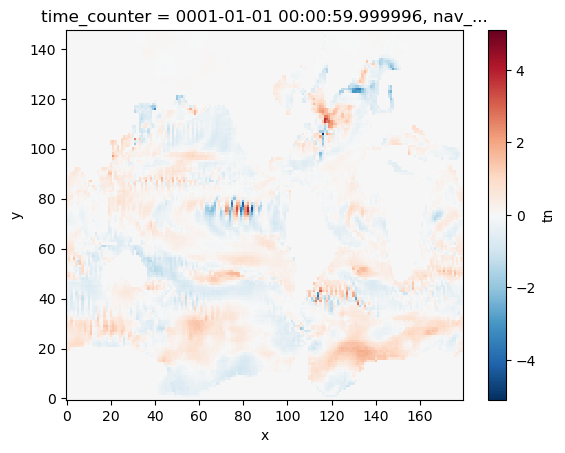

In [18]:
field['tn'].isel(nav_lev=0).plot()

In [5]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), "restart.nc")
ndata = xr.open_mfdataset(filename, use_cftime=True)
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), "lfr0_00233760_restart.nc")
rdata = xr.open_mfdataset(filename, use_cftime=True)

In [6]:
ndata

<xarray.Dataset> Size: 96MB
Dimensions:       (y: 148, x: 180, nav_lev: 31, time_counter: 1)
Coordinates:
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
  * time_counter  (time_counter) float32 4B 2.338e+05
Dimensions without coordinates: y, x
Data variables: (12/41)
    nav_lon       (y, x) float32 107kB dask.array<chunksize=(135, 180), meta=np.ndarray>
    nav_lat       (y, x) float32 107kB dask.array<chunksize=(135, 180), meta=np.ndarray>
    kt            float64 8B ...
    ndastp        float64 8B ...
    adatrj        float64 8B ...
    ntime         float64 8B ...
    ...            ...
    sshn          (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 135, 180), meta=np.ndarray>
    un            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    vn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    tn            (nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    rhop          (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
Attributes:
    file_name:  /ec/res4/scratch/itas/martini/lfr0/041/lfr0_00233760_restart.nc
    TimeStamp:  21/06/2024 16:05:09 -0000

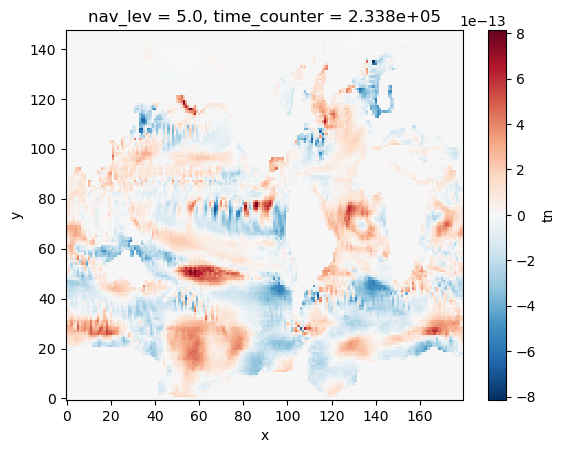

In [7]:
delta = ndata[var].isel(nav_lev=0)-rdata[var].isel(time_counter=0,nav_lev=0)
delta.plot()

In [9]:
rdata['time_counter'].values

array([233760.], dtype=float32)

In [13]:
leg=35
filename = os.path.join(dirs['tmp'], str(leg).zfill(3), "lfr0_*_restart.nc")
rdata = xr.open_mfdataset(filename, use_cftime=True)
rdata

<xarray.Dataset> Size: 96MB
Dimensions:       (y: 148, x: 180, nav_lev: 31, time_counter: 1)
Coordinates:
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
  * time_counter  (time_counter) float32 4B 1.987e+05
Dimensions without coordinates: y, x
Data variables: (12/41)
    nav_lon       (y, x) float32 107kB dask.array<chunksize=(135, 180), meta=np.ndarray>
    nav_lat       (y, x) float32 107kB dask.array<chunksize=(135, 180), meta=np.ndarray>
    kt            float64 8B ...
    ndastp        float64 8B ...
    adatrj        float64 8B ...
    ntime         float64 8B ...
    ...            ...
    sshn          (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 135, 180), meta=np.ndarray>
    un            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    vn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    tn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    sn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
    rhop          (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 135, 180), meta=np.ndarray>
Attributes:
    file_name:  /ec/res4/scratch/itas/martini/lfr0/035/lfr0_00198688_restart.nc
    TimeStamp:  21/06/2024 16:04:00 -0000

In [14]:
rdata['time_counter'].values

array([198688.], dtype=float32)

In [15]:
filename = os.path.join(dirs['tmp'], str(endleg).zfill(3), "out.nc")
out = xr.open_mfdataset(filename, use_cftime=True)
out

<xarray.Dataset> Size: 96MB
Dimensions:       (time_counter: 1, nav_lev: 31, y: 148, x: 180)
Coordinates:
  * time_counter  (time_counter) float32 4B 2.03e+07
  * nav_lev       (nav_lev) float32 124B 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
Dimensions without coordinates: y, x
Data variables: (12/33)
    nav_lon       (y, x) float32 107kB dask.array<chunksize=(1, 180), meta=np.ndarray>
    nav_lat       (y, x) float32 107kB dask.array<chunksize=(1, 180), meta=np.ndarray>
    rnf_b         (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    rnf_hc_b      (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    rnf_sc_b      (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    utau_b        (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    ...            ...
    sshn          (time_counter, y, x) float64 213kB dask.array<chunksize=(1, 1, 180), meta=np.ndarray>
    un            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    vn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    tn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    sn            (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
    rhop          (time_counter, nav_lev, y, x) float64 7MB dask.array<chunksize=(1, 1, 1, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    file_name:    /ec/res4/scratch/itas/martini/lfr0/041/lfr0_00233760_restar...
    TimeStamp:    21/06/2024 16:05:09 -0000
    history:      Mon Jun 24 15:50:13 2024: cdo settaxis,2030-01-01,00:00:00 ...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [17]:
out['time_counter'].values

array([20300100.], dtype=float32)